In [361]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [362]:
path = "/content/CO2_Emissions_Canada.csv"

In [363]:
df = pd.read_csv(path)

In [364]:
# df

In [365]:
# Data Preprocessing

In [366]:
df.drop(axis="columns", labels="Model", inplace=True)

In [367]:
columns_to_onehot_encode = ["Make", "Fuel Type", "Vehicle Class", "Transmission"]

In [368]:
df = pd.get_dummies(df, columns = columns_to_onehot_encode)

In [369]:
# df

In [370]:
df.duplicated().sum()

2171

In [371]:
df.drop(axis = "rows", labels=df.index[df.duplicated()], inplace=True)

In [372]:
df.duplicated().sum()

0

In [373]:
df

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,...,Transmission_AS8,Transmission_AS9,Transmission_AV,Transmission_AV10,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7
0,2.0,4,9.9,6.7,8.5,33,196,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.4,4,11.2,7.7,9.6,29,221,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1.5,4,6.0,5.8,5.9,48,136,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3.5,6,12.7,9.1,11.1,25,255,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.5,6,12.1,8.7,10.6,27,244,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,30,219,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7381,2.0,4,11.2,8.3,9.9,29,232,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7382,2.0,4,11.7,8.6,10.3,27,240,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7383,2.0,4,11.2,8.3,9.9,29,232,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [374]:
# ..................

In [375]:
# Data Standardisation Starts

In [376]:
df2 = df.iloc[: , 7:5215].copy()

In [377]:
df2

,Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,Make_BENTLEY,Make_BMW,Make_BUGATTI,Make_BUICK,Make_CADILLAC,Make_CHEVROLET,...,Transmission_AS8,Transmission_AS9,Transmission_AV,Transmission_AV10,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7381,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7382,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7383,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [378]:
class Standardizer:
      def __init__(self, mean, stdev):
          self.mean = mean
          self.stdev = stdev
      def scale(self, x):
          return (x - self.mean) / self.stdev

In [379]:
list = ["Engine Size(L)", "Cylinders", "Fuel Consumption City (L/100 km)", "Fuel Consumption Hwy (L/100 km)", "Fuel Consumption Comb (L/100 km)", "Fuel Consumption Comb (mpg)", "CO2 Emissions(g/km)"]
j = 6
for i in range(7):
    abv = df[list[j]]
    abv_after_Standardisation = abv.apply(Standardizer(abv.mean(), abv.std()).scale)
    df2.insert(0,list[j],abv_after_Standardisation)
    j = j - 1


In [380]:
df2

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,...,Transmission_AS8,Transmission_AS9,Transmission_AV,Transmission_AV10,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7
0,-0.833535,-0.851454,-0.737780,-1.007931,-0.827221,0.738927,-0.900324,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.538452,-0.851454,-0.375123,-0.577817,-0.458695,0.193364,-0.480006,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.202388,-0.851454,-1.825752,-1.395034,-1.698284,2.784788,-1.909085,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.273025,0.245120,0.043327,0.024343,0.043841,-0.352199,0.091625,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.273025,0.245120,-0.124053,-0.147702,-0.123671,-0.079417,-0.093315,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,-0.833535,-0.851454,-0.514607,-0.577817,-0.525700,0.329755,-0.513632,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7381,-0.833535,-0.851454,-0.375123,-0.319748,-0.358188,0.193364,-0.295067,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7382,-0.833535,-0.851454,-0.235640,-0.190714,-0.224178,-0.079417,-0.160565,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7383,-0.833535,-0.851454,-0.375123,-0.319748,-0.358188,0.193364,-0.295067,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [381]:
# Let us start univariate linear regression now 

In [382]:
corr = df2.corr()

In [383]:
cor_target = abs(corr["CO2 Emissions(g/km)"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Engine Size(L)                      0.851037
Cylinders                           0.828824
Fuel Consumption City (L/100 km)    0.915752
Fuel Consumption Hwy (L/100 km)     0.880578
Fuel Consumption Comb (L/100 km)    0.913580
Fuel Consumption Comb (mpg)         0.904813
CO2 Emissions(g/km)                 1.000000
Name: CO2 Emissions(g/km), dtype: float64

In [384]:
# So, as we can see Fuel Consuption City is highly related with CO2 Emissions in correlation matrix, so let's select that as a feature for inivariate regression.

In [385]:
feature_for_univariate_linear_regression = df2.iloc[: , 2:3].copy()

In [386]:
# feature_for_univariate_linear_regression

In [387]:
Y_real_values = df.iloc[: , 6:7].copy()

In [388]:
# Y_real_values

In [389]:
Train_X = feature_for_univariate_linear_regression.iloc[0:3650 , :].copy()

In [390]:
# Train_X

In [391]:
Train_Y = Y_real_values.iloc[0:3650 , :].copy()

In [392]:
# Train_Y

In [393]:
Test_X = feature_for_univariate_linear_regression.iloc[3650:5215 , :].copy()

In [394]:
# Test_X

In [395]:
Test_Y = Y_real_values.iloc[3650:5215 , :].copy()

In [396]:
# Test_Y

In [397]:
# Converting Datafranes to Array

In [398]:
X_Train = Train_X.to_numpy()

In [399]:
# X_Train

In [400]:
Y_Train = Train_Y.to_numpy()

In [401]:
# Y_Train

In [402]:
X_Test = Test_X.to_numpy()

In [405]:
# X_Test

In [406]:
Y_Test = Test_Y.to_numpy()

In [407]:
# Y_Test

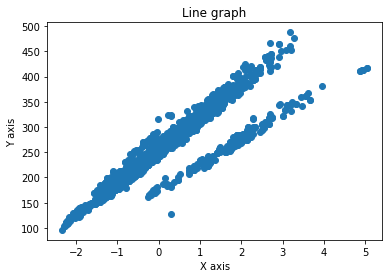

In [408]:
plt.title("Line graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.scatter(X_Train, Y_Train)
plt.show()

In [409]:
# ..........................................................

In [410]:
# Univariate Linear Regression Closed Form

In [411]:
def find_theta(X, Y):
    
    m = X.shape[0] # Number of training examples. 
    # Appending a cloumn of ones in X to add the bias term.
    X = np.append(X, np.ones((m,1)), axis=1)
    # reshaping y to (m,1)
    Y = Y.reshape(m,1)
    
    # The Normal Equation
    theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, Y))
    
    return theta

In [412]:
def predict(X):
    
    # Appending a cloumn of ones in X to add the bias term.
    X = np.append(X, np.ones((X.shape[0],1)), axis=1)
    
    # preds is y_hat which is the dot product of X and theta.
    preds = np.dot(X, theta)
    
    return preds

In [413]:
# Getting the Value of theta using the find_theta function.
theta = find_theta(X_Train, Y_Train)

In [414]:
theta

array([[ 53.41234491],
       [247.70840817]])

Text(0.5, 1.0, 'Linear Regression Prediction graph')

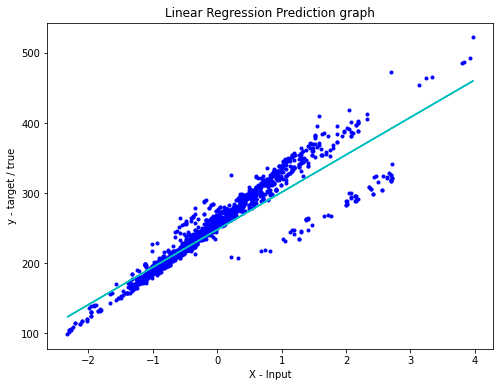

In [415]:
# Getting the predictions on X using the predict function.
preds = predict(X_Test)
# Plotting the predictions.
fig = plt.figure(figsize=(8,6))
plt.plot(X_Test, Y_Test, 'b.')
plt.plot(X_Test, preds, 'c-')
plt.xlabel('X - Input')
plt.ylabel('y - target / true')
plt.title("Linear Regression Prediction graph")

In [416]:
# preds

In [417]:
# Y_Test

In [418]:
# Calculating MSE

In [419]:
MSE_Array = (preds - Y_Test)*(preds - Y_Test)

In [420]:
# MSE_Array

In [421]:
N = MSE_Array.size

In [422]:
# N

In [423]:
Square_Of_Errors = np.sum(MSE_Array)

In [424]:
# Square_Of_Errors

In [425]:
MSE = Square_Of_Errors / N

In [426]:
print("MSE of univariate Linear Regression Closed Form = {0}" .format(MSE))

MSE of univariate Linear Regression Closed Form = 514.04523390012


In [427]:
# Calculating MAE

In [428]:
MAE_Array = abs(preds - Y_Test)

In [429]:
# MAE_Array

In [430]:
Absolute_Of_Errors = np.sum(MAE_Array)

In [431]:
# Absolute_Of_Errors

In [432]:
MAE = Absolute_Of_Errors / N

In [433]:
print("MAE of univariate Linear Regression Closed Form = {0}" .format(MAE))

MAE of univariate Linear Regression Closed Form = 16.060907968236126


In [434]:
# Check MAE using Sklearn module
# MAE_Real = mean_absolute_error(Y_Test,preds)
# MAE_Real

In [435]:
# Check MSE using Sklearn module
# MSE_Real = mean_squared_error(Y_Test,preds)
# MSE_Real

In [ ]:
# ..................................................

In [455]:
# Linear Regression Univariate Gradient-Descent

In [456]:
# Hypothesis i.e. h(x) = y ?
def h(x, theta_0 = 0, theta_1 = 0):
    return theta_0 + (theta_1 * x)

In [457]:
# Cost Function
def J(theta_0, theta_1, X, y):
    diff = (np.subtract(h(X, theta_0, theta_1),np.asarray(y)))
    diff_squared = np.square(diff)
    return (diff_squared.sum()/(len(X))*2)

In [459]:
# Gradient descent function
def gradient(theta_0, theta_1, alpha, X, y):
    my_array_0 = (np.subtract(h(X, theta_0, theta_1),np.asarray(y)))
    my_array_1 = np.matmul(np.transpose(my_array_0), X)
    
    theta_0_temp = (alpha / len(X)) * my_array_0.sum()
    theta_1_temp = (alpha / len(X)) * my_array_1.sum()
    
    new_theta_0 = theta_0-theta_0_temp
    new_theta_1 = theta_1-theta_1_temp
    
    return (new_theta_0, new_theta_1)

Streaming output truncated to the last 5000 lines.
theta 0: 247.20028753717676
theta 1: 53.83829977945933
cost: 1204.1945996059032

Iteration: 599
diff: 0.017494833801720233
theta 0: 247.2052951060118
theta 1: 53.83395452822018
cost: 1204.1774530516827

Iteration: 600
diff: 0.01714655422051692
theta 0: 247.21025335034923
theta 1: 53.82965363416601
cost: 1204.1606478414894

Iteration: 601
diff: 0.01680521019329717
theta 0: 247.21516275576582
theta 1: 53.825396644179776
cost: 1204.144177177925

Iteration: 602
diff: 0.016470663564405186
theta 0: 247.22002380306074
theta 1: 53.8211831097763
cost: 1204.1280343989988

Iteration: 603
diff: 0.0161427789262234
theta 0: 247.22483696830278
theta 1: 53.81701258705485
cost: 1204.1122129754237

Iteration: 604
diff: 0.015821423575062
theta 0: 247.2296027228768
theta 1: 53.81288463665225
cost: 1204.096706507976

Iteration: 605
diff: 0.015506467447721661
theta 0: 247.23432153352968
theta 1: 53.808798823696485
cost: 1204.0815087249023

Iteration: 606
di

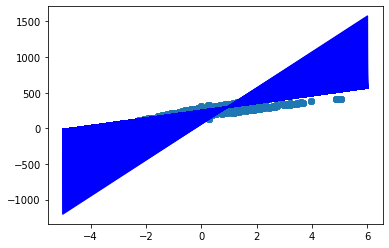

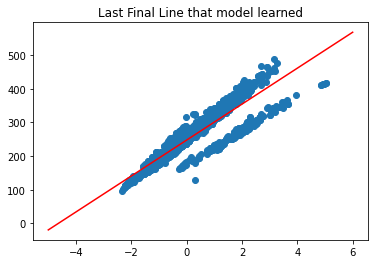

In [469]:
# Initialize theat_0, theat_1 qnd the learning rate 
alpha = 0.01
theta_0 = 60
theta_1 = 252

# Convergence threshold
my_diff = 0.000000001

# Initial cost value
diff = J(theta_0, theta_1, X_Train, Y_Train)
print("initial Cost: {}".format(J(theta_0, theta_1, X_Train, Y_Train)))

# We will count the number of iterations
my_iter = 0

while diff >= my_diff:
    # Draw the current hypothesis and the training 
    # set to the x-y plane.
    # We will draw all the hypothesis lines so that
    # the reader can see how the hypothesis changes
    # with each iteration.
    my_line = np.linspace(-5,6)
    z = theta_0 + theta_1 * (my_line)
    plt.scatter(X_Train, Y_Train)
    plt.plot(my_line,z, 'b')
    
    # calculate initial cost value
    initial_cost = J(theta_0, theta_1, X_Train, Y_Train)
    
    # calculate and assign the new theta_0 and theta_1 values
    theta_0, theta_1 = gradient(theta_0, theta_1, alpha, X_Train, Y_Train)
    
    # calculate the consecutive cost value
    new_cost = J(theta_0, theta_1, X_Train, Y_Train)
    print("cost: {}".format(new_cost))
    
    # calculate the difference between the consecutive
    # cost values
    diff = initial_cost - new_cost
    
    my_iter += 1
    
    print()
    print("Iteration: {}".format(my_iter))
    print("diff: {}".format(diff))
    print("theta 0: {}".format(theta_0))
    print("theta 1: {}".format(theta_1))
    
plt.show()

my_line = np.linspace(-5,6)
z = theta_0 + theta_1 * (my_line)
plt.scatter(X_Train, Y_Train)
plt.plot(my_line,z, 'r')
plt.title("Last Final Line that model learned")
plt.show()

In [502]:
theta_pred = np.array([[theta_1], [theta_0]])

In [503]:
# theta_pred

In [480]:
Y_Predicted = X_Test*theta_1 + theta_0

In [504]:
# Y_Predicted

In [505]:
# Y_Test

In [487]:
MSE_Gradient_Descent_Univariate = np.sum((Y_Predicted - Y_Test)*(Y_Predicted - Y_Test)) / (Y_Test.size)

In [488]:
print("MSE of univariate Linear Regression Gradient Descent = {0}" .format(MSE_Gradient_Descent_Univariate))

MSE of univariate Linear Regression Gradient Descent = 514.0462402146042


In [489]:
MAE_Gradient_Descent_Univariate = np.sum(abs(Y_Predicted - Y_Test)) / (Y_Test.size)

In [490]:
print("MAE of univariate Linear Regression Gradient Descent = {0}" .format(MAE_Gradient_Descent_Univariate))

MAE of univariate Linear Regression Gradient Descent = 16.060921929764273


In [497]:
# # Check MAE using Sklearn module
# MAE_Real = mean_absolute_error(Y_Test,Y_Predicted)
# MAE_Real

In [501]:
# # Check MSE using Sklearn module
# MSE_Real = mean_squared_error(Y_Test,Y_Predicted)
# MSE_Real